In [1]:
# For figures.
%matplotlib inline

In [2]:
# Hyperparameters.
learning_rate = 0.0003
batch_size = 20
epochs = 50

In [3]:
# Import modules.
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
# Normalize.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download train and test set.
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


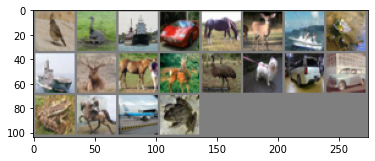

bird  bird  ship  car   horse deer  ship  frog  ship  deer  horse deer  bird  dog   car   car   frog  horse plane frog 


In [5]:
## Visualize ##
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image.
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9, nesterov = True)
#optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [8]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.303
[2,  2000] loss: 2.293
[3,  2000] loss: 2.052
[4,  2000] loss: 1.821
[5,  2000] loss: 1.658
[6,  2000] loss: 1.583
[7,  2000] loss: 1.524
[8,  2000] loss: 1.466
[9,  2000] loss: 1.414
[10,  2000] loss: 1.371
[11,  2000] loss: 1.336
[12,  2000] loss: 1.297
[13,  2000] loss: 1.258
[14,  2000] loss: 1.232
[15,  2000] loss: 1.198
[16,  2000] loss: 1.173
[17,  2000] loss: 1.146
[18,  2000] loss: 1.126
[19,  2000] loss: 1.105
[20,  2000] loss: 1.086
[21,  2000] loss: 1.066
[22,  2000] loss: 1.047
[23,  2000] loss: 1.027
[24,  2000] loss: 1.013
[25,  2000] loss: 0.998
[26,  2000] loss: 0.982
[27,  2000] loss: 0.969
[28,  2000] loss: 0.947
[29,  2000] loss: 0.935
[30,  2000] loss: 0.925
[31,  2000] loss: 0.907
[32,  2000] loss: 0.895
[33,  2000] loss: 0.885
[34,  2000] loss: 0.869
[35,  2000] loss: 0.861
[36,  2000] loss: 0.842
[37,  2000] loss: 0.835
[38,  2000] loss: 0.820
[39,  2000] loss: 0.814
[40,  2000] loss: 0.796
[41,  2000] loss: 0.792
[42,  2000] loss: 0.781
[

In [9]:
PATH = './cifar_net_8.pth'
torch.save(net.state_dict(), PATH)

In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 59 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 65.0 %
Accuracy for class: car   is 76.8 %
Accuracy for class: bird  is 46.9 %
Accuracy for class: cat   is 30.7 %
Accuracy for class: deer  is 57.3 %
Accuracy for class: dog   is 50.9 %
Accuracy for class: frog  is 63.6 %
Accuracy for class: horse is 73.4 %
Accuracy for class: ship  is 72.2 %
Accuracy for class: truck is 61.9 %


In [13]:
# To re-load previous model
PATH = './cifar_net_7.pth'
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>